In [ ]:
!pip install simpletransformers > /dev/null

In [ ]:
import pandas as pd
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)


# Load training data
training_data_path = "/HF Approach/training_new.csv"
test_data_path = "/HF Approach/test_new.csv"

train_df = pd.read_csv(training_data_path)
train_df.drop('number_of_words', axis=1, inplace=True)
train_df = train_df.rename(columns={'label': 'labels'})

test_df = pd.read_csv(test_data_path)
test_df.drop('number_of_words', axis=1, inplace=True)
test_df = test_df.rename(columns={'label': 'labels'})

train_df.head()

,labels,text
0,0,Ein Frisör schneidet den Menschen die Haare. D...
1,0,Der Name Miley kommt aus Miley Cyrus Kindheit....
2,0,Der Vogel hat sich in der Plastik-Folie verfan...
3,0,Das passt nicht zu einer Prinzessin und zu Abe...
4,0,Und die anderen Menschen verstehen die Gebärde...


In [ ]:
# Evaluation
import zipfile
import os
from simpletransformers.classification import ClassificationModel
import sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from datetime import datetime


def helper(labels, preds):
  report = classification_report(labels, preds)
  #print(report)

  #print("Precision (micro): %f" % precision_score(labels, preds, average='micro'))
  #print("Recall (micro):    %f" % recall_score(labels, preds, average='micro'))
  #print("F1 score (micro):  %f" % f1_score(labels, preds, average='micro'), end='\n\n')

  print("Precision (macro): %f" % precision_score(labels, preds, average='macro'))
  print("Recall (macro):    %f" % recall_score(labels, preds, average='macro'))
  print("F1 score (macro):  %f" % f1_score(labels, preds, average='macro'), end='\n\n')

  #print("Precision (weighted): %f" % precision_score(labels, preds, average='weighted'))
  #print("Recall (weighted):    %f" % recall_score(labels, preds, average='weighted'))
  #print("F1 score (weighted):  %f" % f1_score(labels, preds, average='weighted'))


  plt.clf()
  time = datetime.now().time().strftime("%H-%M-%S")

  f = open("/HF Approach/plots/" + time + ".txt", "a")
  f.write(report)
  f.close()

  # Render confusion matrix
  cm_rbf = confusion_matrix(labels, preds)
  class_names = ["leichte\nSprache", "einfache\nSprache", "Alltags-\nsprache", "Fach-\nsprache"]

  np.set_printoptions(precision=2)
  # Plot non-normalized confusion matrix
  titles_options = [
      ("Konfusionsmatrix, ohne Normalisierung", None),
      ("Normalisierte Konfusionsmatrix", "true"),
  ]

  for title, normalize in titles_options:
    tmp = plt.figure()
    plt.clf()
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true=labels,
        y_pred=preds,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    #disp.ax_.set_title(title)

    if normalize:
      matrix_type = "normalized"
    else:
      matrix_type = "default"

    plt.savefig('/HF Approach/plots/' + time + "_" + matrix_type +  '.pdf', bbox_inches='tight')
  plt.show()
  return f1_score(labels, preds, average='micro')


def evaluate_model(file, name, version, architecture, test_df):
  output_path = "/content/models/" + name + "_" + str(version)
  model_path = "/HF Approach/output/" + file

  if not os.path.exists(output_path):
    with zipfile.ZipFile(model_path, 'r') as zip_ref:
      zip_ref.extractall(output_path)

  #xlnet-2
  #xlmroberta
  #bert
  #xlmroberta-v2
  #distilbert-2
  #roberta-2
  #xlmroberta
  #gbert-2
  #outputs

  if os.path.exists(output_path + "/content/" + name):
    model_path = output_path + "/content/" + name
  elif os.path.exists(output_path + "/content/" + name + "-" + str(version)):
    model_path = output_path + "/content/" + name + "-" + str(version)
  elif os.path.exists(output_path + "/content/" + name + "-v" + str(version)):
    model_path = output_path + "/content/" + name + "-v" + str(version)
  elif os.path.exists(output_path + "/content/outputs"):
    model_path = output_path + "/content/outputs"
  elif os.path.exists(output_path + "/content/electra-2"):
    model_path = output_path + "/content/electra-2"
  else:
    print("cannot find mode path for " + file)
    return False

  model = ClassificationModel(architecture, model_path, use_cuda=True)

  time = datetime.now().time().strftime("%H-%M-%S")
  f = open("/HF Approach/plots/" + time + ".txt", "a")

  report = ""

  print("**** Evaluation " + name + " Version: " + str(version) + " ****")
  report += "**** Evaluation " + name + " Version: " + str(version) + " ****\n"
  result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=helper, acc=accuracy_score)
  report += str(result)
  print("**************************************")
  f.write(report)
  f.close()

# 2: simple Transformers

**** Evaluation gelectra Version: 2 ****


  0%|          | 0/65026 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/4065 [00:00<?, ?it/s]

Precision (macro): 0.966791
Recall (macro):    0.967170
F1 score (macro):  0.966934



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

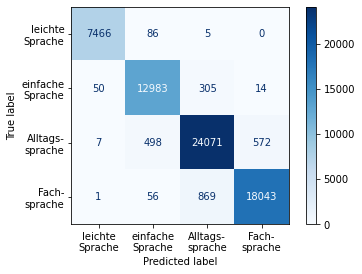

<Figure size 432x288 with 0 Axes>

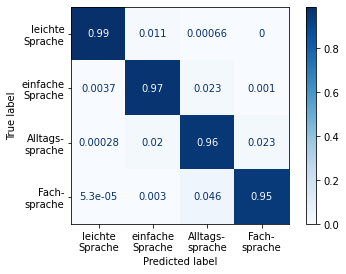

**************************************
**** Evaluation gelectra Version: 1 ****


  0%|          | 0/65026 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/4065 [00:00<?, ?it/s]

Precision (macro): 0.979674
Recall (macro):    0.982297
F1 score (macro):  0.980939



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

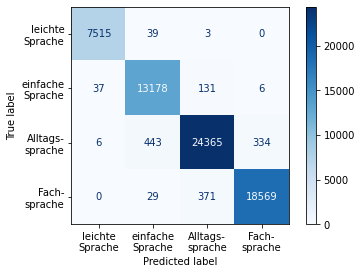

<Figure size 432x288 with 0 Axes>

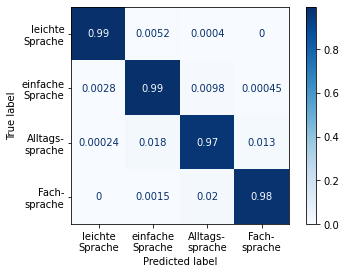

**************************************
**** Evaluation gbert Version: 2 ****


  0%|          | 0/65026 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/4065 [00:00<?, ?it/s]

Precision (macro): 0.966616
Recall (macro):    0.966279
F1 score (macro):  0.966397



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

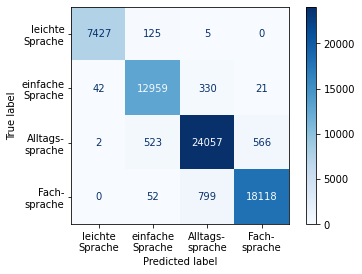

<Figure size 432x288 with 0 Axes>

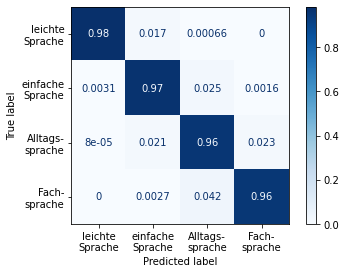

**************************************
**** Evaluation gbert Version: 1 ****


  0%|          | 0/65026 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/4065 [00:00<?, ?it/s]

Precision (macro): 0.980632
Recall (macro):    0.983008
F1 score (macro):  0.981783



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

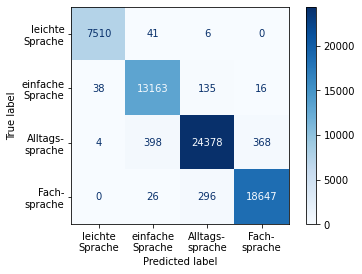

<Figure size 432x288 with 0 Axes>

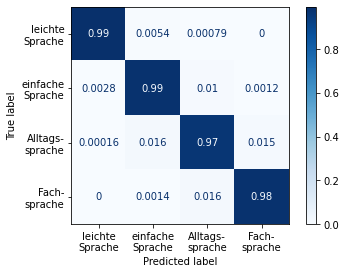

**************************************
**** Evaluation xlnet Version: 2 ****


  0%|          | 0/65026 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/4065 [00:00<?, ?it/s]

Precision (macro): 0.936186
Recall (macro):    0.943494
F1 score (macro):  0.939697



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

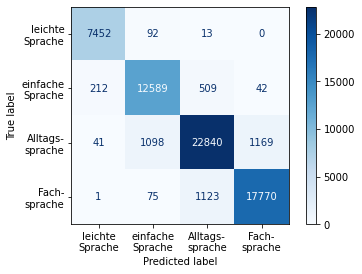

<Figure size 432x288 with 0 Axes>

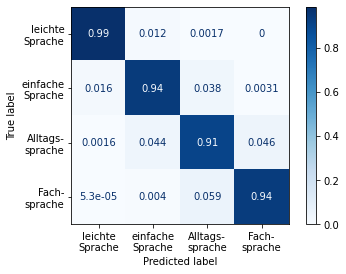

**************************************
**** Evaluation xlnet Version: 1 ****


  0%|          | 0/65026 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/4065 [00:00<?, ?it/s]

Precision (macro): 0.953059
Recall (macro):    0.962518
F1 score (macro):  0.957578



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

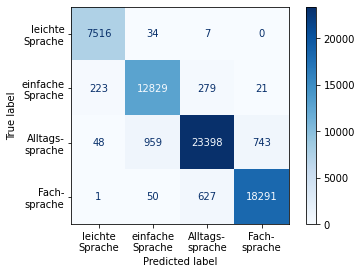

<Figure size 432x288 with 0 Axes>

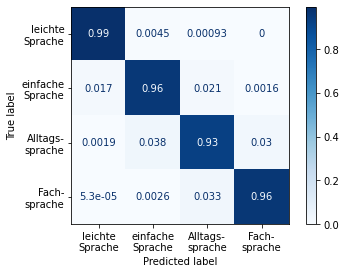

**************************************
**** Evaluation roberta Version: 2 ****


  0%|          | 0/65026 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/4065 [00:00<?, ?it/s]

Precision (macro): 0.940572
Recall (macro):    0.946553
F1 score (macro):  0.943381



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

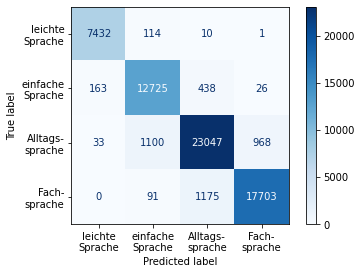

<Figure size 432x288 with 0 Axes>

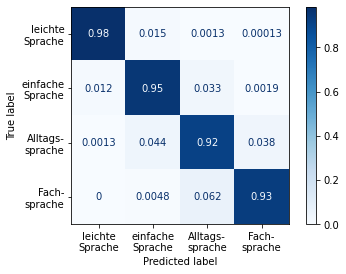

**************************************
**** Evaluation roberta Version: 1 ****


  0%|          | 0/65026 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/4065 [00:00<?, ?it/s]

Precision (macro): 0.956789
Recall (macro):    0.964852
F1 score (macro):  0.960547



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

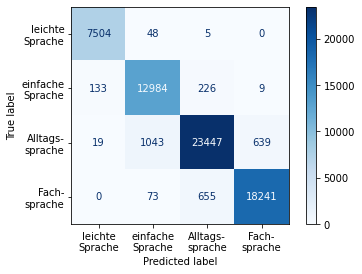

<Figure size 432x288 with 0 Axes>

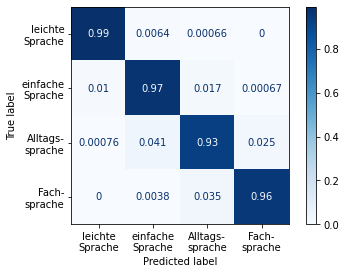

**************************************
**** Evaluation distilbert Version: 2 ****


  0%|          | 0/65026 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/4065 [00:00<?, ?it/s]

Precision (macro): 0.938728
Recall (macro):    0.941842
F1 score (macro):  0.940214



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

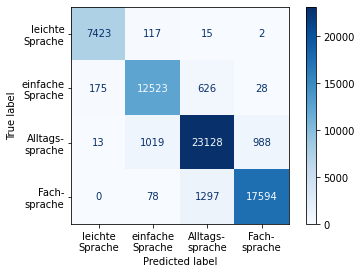

<Figure size 432x288 with 0 Axes>

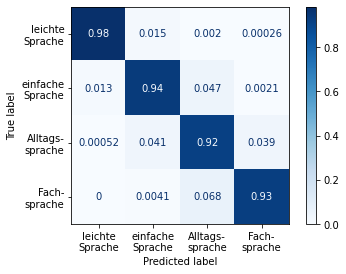

**************************************
**** Evaluation distilbert Version: 1 ****


  0%|          | 0/65026 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/4065 [00:00<?, ?it/s]

Precision (macro): 0.957802
Recall (macro):    0.964571
F1 score (macro):  0.961065



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

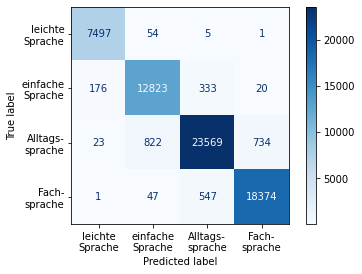

<Figure size 432x288 with 0 Axes>

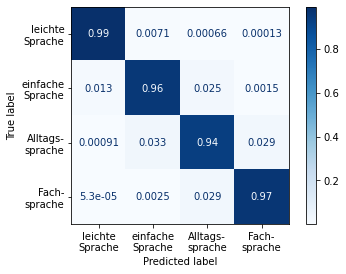

**************************************


In [ ]:
# German Electra: deepset/gelectra-base
model = evaluate_model("simple-transformer-gelectra-12.10.2022.zip", "gelectra", 2, "electra", test_df)
model = evaluate_model("simple-transformer-gelectra-11.10.2022.zip", "gelectra", 1, "electra", test_df)

# German Bert: deepset/gbert-base
model = evaluate_model("simple-transformer-gbert-12.10.2022.zip", "gbert", 2, "bert", test_df)
model = evaluate_model("simple-transformer-gbert-11.10.2022.zip", "gbert", 1, "bert", test_df)

# XLNet: xlnet-base-cased
model = evaluate_model("simple-transformer-xlnet-12.10.2022.zip", "xlnet", 2, "xlnet", test_df)
model = evaluate_model("simple-transformer-xlnet-11.10.2022.zip", "xlnet", 1, "xlnet", test_df)

# Roberta: roberta-base
model = evaluate_model("simple-transformer-roberta-12.10.2022.zip", "roberta", 2, "roberta", test_df)
model = evaluate_model("simple-transformer-roberta-11.10.2022.zip", "roberta", 1, "roberta", test_df)

# Distilbert: distilbert-base-cased
model = evaluate_model("simple-transformer-distilbert-12.10.2022.zip", "distilbert", 2, "distilbert", test_df)
model = evaluate_model("simple-transformer-distilbert-11.10.2022.zip", "distilbert", 1, "distilbert", test_df)